# COGS 108 - Final Project 

# Overview

In the following project, our team analyzed the factors that most influenced adoption rates in dogs, and determined if it is possible to predict a dog's adoption likelihood based on these factors. We gathered data from adoption centers in the U.S. and compared against the popularity of dog breeds in the U.S. as a whole. We found that medium sized, female dogs are more likely to be adopted, and that breed was a major factor in terms of adoption rate. Finally, we used these factors to predict the likelihood of adoption by training a machine learning algorithm which ended up with ~70% accuracy.

# Names

- Isaac Bi
- Bella Chen
- Cole Franklin
- Ji Hyun An
- Khoi Tran

# Research Question

Is it possible to predict the likelihood of a dog’s adoption given that dog’s traits? More specifically, can traits such as size, breed, and age be used to generate a machine learning model that predicts the likelihood of a dog’s adoption?

## Background and Prior Work


Although the original idea for our project was to track the holiday season's effect on the number of animals in shelters, we decided instead to focus on finding out which factors contributed the most to the likelihood of a dog's adoption. We also sought to develop a machine learning model for predicting a dog's likelihood of adoption. Khoi’s sister, who works as a veterinary technician, originally provided this idea for us through her experience and concern for this topic. Moreover, this topic resonated well with us because most of us are pet owners. We hope that our analysis of this topic can be useful for helping animal shelters develop a plan to direct attention to the dogs who are least likely to be adopted, such as advertising more photos of specific dogs on their website and social media, or holding special discounts for certain breeds.

With the insurgence of the COVID-19 pandemic, combined with the upcoming holiday season, dog adoption rates have been on the rise. The social disconnect caused by the pandemic has led many people to rely on furry companions for support, especially because many Americans have been forced to work from home or have more free time than they did before. According to the Washington Post, "Shelters, nonprofit rescues, private breeders, pet stores — all reported more consumer demand than there were dogs and puppies to fill it. Some rescues were reporting dozens of applications for individual dogs. Some breeders were reporting waiting lists well into 2021.[1] Although dog adoptions are currently at an all time high, we wondered what would happen to the animals still remaining in shelters after the pandemic dog frenzy is over. The American Society for the Prevention of Cruelty to Animals states that approximately 1.5 million shelter animals are euthanized every year.[2] This makes our topic important because it can provide shelter dogs with a better chance to have a loving home rather than being put down. Additionally, helping more dogs get adopted will put less strain on shelters which may be running out of space or resources.

One person who has done extensive research on this topic is Jennifer Cattet, Ph.D. According to her research, most potential adopters only spend less than 70 seconds to evaluate each dog, and they only look at about a third of the dogs available.[3] Thus, the physical placement of dogs in the shelter can play a very important role in their adoption rate. In terms of the physical characteristics of the dogs, Cattet found that "breed type, age and information on the cage card (such as the mode of intake and length of stay) were the most important reasons for a dog to be considered."[3] Furthermore, fighting and sporting dogs, larger dogs, and dogs picked up as strays are less likely to be adopted.

Based on this research done by Dr. Cattet, we were able to formulate an initial hypothesis for our research question. We also employed our personal experiences with dog adopting and general assumptions about what the average person would look for in a dog. Since many large fighting dogs, such as pitbulls, are stereotyped as being violent, we thought that adopters would tend to choose these types of dogs less. Additionally, we assumed that adopters would be more likely to choose younger dogs and puppies because they are perceived as more attractive and can live longer when compared to older dogs.
***

*References:*

1. Kavin, K. (2020, August 15). Dog adoptions and sales soar during the pandemic. Retrieved November 04, 2020, from https://www.washingtonpost.com/nation/2020/08/12/adoptions-dogs-coronavirus/
2. Pet Statistics. Retrieved November 05, 2020, from https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics
3. Cattet, Jennifer. (2016, April 08). Shelter dogs: Studies highlight why some are adopted, others aren't. Retrieved November 05, 2020, from https://blog.smartanimaltraining.com/2014/08/11/shelter-dogs-studies-highlight-why-some-are-adopted-others-arent/

# Hypothesis


We predict that factors such as dog size, age, and breed affect adoption rates. More specifically, we hypothesize that dogs that are small, young, and are a family-friendly breed will be more likely to be adopted. In this case, “more likely to be adopted” means as a ratio compared to the amount of that kind of dog, not just raw numbers.

# Dataset(s)


Dataset #1: Our first dataset shows when the animal was taken in, the reason (stray, surrendered by owner), condition they were in, sex, breed, age, when they left, and how long they stayed. This shows us the rate dogs that came in and out of the Austin Animal shelter and their basic traits (age, breed, sex).

- Dataset Name: all_records.csv (stored in shelter_df)
- Link to the dataset: https://data.world/rdowns26/austin-animal-shelter
- Number of observations: The initial CSV file had 76,977 observations. After cleaning the dataset to just dogs, we had 48097 observations. Second round of cleaning left our observations at 29523 which is what we used for our analysis.

Dataset #2: Our second dataset shows the number of animals ready to be adopted in the Montgomery County Animal Services and Adoption Center by animal breed, intake type, age, intake date, size, color, and sex. Through the intake date, we can see how long certain animals have been waiting for adoption and compare their individual traits such as age, breed, color, and sex.

- Dataset Name: comma-separated-values-file-1.csv (stored in adoptable_df)
- Link to the dataset: https://data.world/montgomery-county-of-maryland/7f91633a-17c4-4829-afaa-1d79d670e808
- Number of observations: The initial CSV file had 141 observations. After cleaning our data (such as limiting the observations to just dogs), we had 42 observations.

Our team plans to use these datasets to compare the rate in which certain dogs with specific traits get adopted. Our first and second dataset will allow us to compare the rates by different regions.

# Setup

### Import Packages

In [1]:
# numpy and pandas
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set(style="white", font_scale=1)
sns.set_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Load Datasets

In [2]:
# https://data.world/rdowns26/austin-animal-shelter
shelter_df = pd.read_csv('./all_records.csv') #TODO: clean to include only dogs (remove cats)

#https://data.world/montgomery-county-of-maryland/7f91633a-17c4-4829-afaa-1d79d670e808
adoptable_df = pd.read_csv('comma-separated-values-file-1.csv')

# Data Cleaning

We had 2 datasets: shelter_df and adoptable_df. The steps we took to clean each dataset are outlined below.

## Cleaning shelter_df

For shelter_df, the dataset was already in a structured format, however, we still cleaned it a bit more to make it fit to our needs. Overall, the shelter_df dataframe is very clean because we removed NaN values, standardized units, removed outliers, and accounted for values that were misrepresenting the data.

Additionally, we had to create and clean a new dataframe called encoded_df, which we needed to for our decision tree. The main purpose of this is to convert all categorical columns into binary, which is a process called one-hot encoding.

In [3]:
# Visualize our data sets
shelter_df.head()

,Unnamed: 0,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,...,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,0,A730601,NaN,2016-07-07 12:11:00,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,0 days 20:49:00.000000000,0-7 days
1,1,A683644,*Zoey,2014-07-13 11:02:00,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,...,0,0,0,0,0,0,0,0,115 days 23:04:00.000000000,12 weeks - 6 months
2,2,A676515,Rico,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,0-7 days
3,3,A742953,NaN,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,0-7 days
4,4,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,24 days 22:11:00.000000000,3-6 weeks


First off, we dropped all columns which weren't needed for our analysis, such as 'Name_intake'. We also needed to drop columns like 'Found_Location' which contained personal addresses. Then we renamed existing columns to be consistent lower case underscore syntax. Since this dataset contained information about different animal types, we only kept rows where the animal type was dog, because our research question is about dogs.

In [4]:
# Drop columns for clarity
shelter_df = shelter_df.drop(columns=['Unnamed: 0','Animal ID', 'Name_intake','Found_Location','Sex','Name_outcome',
                                      'Sex_upon_Outcome','gender_intake','fixed_intake','fixed_outcome','fixed_changed','Outcome_Subtype'])

# Rename existing columns to be consistent lower case underscore syntax
shelter_df.columns= ['date_time_intake', 'month_year_intake', 'intake_type', 'conditon_intake', 'animal_type', 'age_months', 'breed', 'color', 
                     'date_time_outcome', 'month_year_outcome', 'outcome_type', 
                     'age_outcome', 'gender_outcome', 'age_bucket',
                     'retriever', 'shepherd', 'beagle', 'terrier', 'boxer', 'poodle', 'rottweiler', 'dachshund', 'chihuahua', 'pit bull', 
                     'date_time_length', 'days_length']

In [5]:
# Only choose rows that include dogs
shelter_df = shelter_df[shelter_df['animal_type'] == 'Dog']

Next, we went ahead and dropped all rows with NaN values. Then, our task was to standardize all the units in the data. The standardize_age_to_month(str_in) method converted all the different time units into months and the standardize_date_time_length(str_in) method cleaned the date_time_length column to be just numerical representations of days. We also needed to remove outliers in the dataset that could potentially skew our data using remove_outlier(df_in, col_name).

In [6]:
shelter_df = shelter_df.dropna()

In [7]:
def standardize_age_to_month(str_in):
    str_in = str_in.strip()
    if 'weeks' in str_in or 'week' in str_in:
        str_in = str_in.replace('weeks', '')
        str_in = str_in.replace('week', '')
        out = int(str_in) / (4)
    elif 'months' in str_in or 'month' in str_in:
        str_in = str_in.replace('months', '')
        str_in = str_in.replace('month', '')
        out = int(str_in)
    elif 'years' in str_in or 'year' in str_in:
        str_in = str_in.replace('years', '')
        str_in = str_in.replace('year', '')
        out = int(str_in) * 12
    else:
        out = np.nan
    return out

In [8]:
def standardize_date_time_length(str_in):
    index = str_in.find('days')
    out = str_in[:index]
    out = int(out)
    return out

In [9]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [10]:
shelter_df['age_months'] = shelter_df['age_months'].apply(standardize_age_to_month)
shelter_df['days_length'] = shelter_df['date_time_length'].apply(standardize_date_time_length)
shelter_df = remove_outlier(shelter_df, 'days_length')

Lastly, we only kept rows where the days_length column was not equal to 0 because the majority of rows that have a days_length value of 0 either mean the shelter did not record how much time the animal spent in the shelter, or the amount of time the animal spent in the shelter was somehow negative, which is not possible.

In [11]:
# Revisualizing the data:
shelter_df.head()

,date_time_intake,month_year_intake,intake_type,conditon_intake,animal_type,age_months,breed,color,date_time_outcome,month_year_outcome,...,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,date_time_length,days_length
2,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,Stray,Normal,Dog,2.0,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,...,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,3
3,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,Stray,Normal,Dog,24.0,Saluki,Sable/Cream,2017-02-04 14:17:00,02/04/2017 02:17:00 PM,...,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,4
11,2014-11-15 15:18:00,11/15/2014 03:18:00 PM,Owner Surrender,Normal,Dog,5.0,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,11/21/2014 06:55:00 PM,...,0,0,0,0,0,0,0,1,6 days 03:37:00.000000000,6
14,2016-02-12 14:35:00,02/12/2016 02:35:00 PM,Stray,Injured,Dog,24.0,Pit Bull Mix,Blue,2016-02-19 16:20:00,02/19/2016 04:20:00 PM,...,0,0,0,0,0,0,0,1,7 days 01:45:00.000000000,7
17,2015-09-06 09:26:00,09/06/2015 09:26:00 AM,Stray,Normal,Dog,3.0,Anatol Shepherd Mix,Brown/Tan,2015-09-07 18:47:00,09/07/2015 06:47:00 PM,...,0,0,0,0,0,0,0,0,1 days 09:21:00.000000000,1


This is where we would want to prepare for our decision tree. 


We can see that in order to get our machine learning model working, we would need to make our outcome and dependent variables into floating point numbers. In order to accomplish this, we will make adoption 1, and anything else 0.

In [12]:
shelter_df['binary_adoption_outcome'] = (shelter_df['outcome_type'] == "Adoption").astype(int)
shelter_df['binary_adoption_outcome'].unique()

array([0, 1])

Because there are over a thousand different types of breeds, we only want to look at the top 20 breeds. 

In [13]:
shelter_df = shelter_df[(shelter_df['breed'] == "Pit Bull Mix") | (shelter_df['breed'] == "Chihuahua Shorthair Mix") | (shelter_df['breed'] == "Labrador Retriever Mix") |
                        (shelter_df['breed'] == "German Shepherd Mix") | (shelter_df['breed'] == "Australian Cattle Dog Mix") | (shelter_df['breed'] == "Dachshund Mix") |
                        (shelter_df['breed'] == "Miniature Poodle Mix") | (shelter_df['breed'] == "Boxer Mix") | (shelter_df['breed'] == "Border Collie Mix") |
                        (shelter_df['breed'] == "Rat Terrier Mix") | (shelter_df['breed'] == "Australian Shepherd Mix") | (shelter_df['breed'] == "Catahoula Mix") |
                        (shelter_df['breed'] == "Jack Russell Terrier Mix") | (shelter_df['breed'] == "Siberian Husky Mix") | (shelter_df['breed'] == "Miniature Schnauzer Mix") |
                        (shelter_df['breed'] == "Yorkshire Terrier Mix") | (shelter_df['breed'] == "Beagle Mix") | (shelter_df['breed'] == "Pointer Mix") |
                        (shelter_df['breed'] == "Chihuahua Longhair Mix") | (shelter_df['breed'] == "Cairn Terrier Mix")]
shelter_df.head()

,date_time_intake,month_year_intake,intake_type,conditon_intake,animal_type,age_months,breed,color,date_time_outcome,month_year_outcome,...,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,date_time_length,days_length,binary_adoption_outcome
2,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,Stray,Normal,Dog,2.0,Pit Bull Mix,White/Brown,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,...,0,0,0,0,0,0,1,3 days 09:53:00.000000000,3,0
11,2014-11-15 15:18:00,11/15/2014 03:18:00 PM,Owner Surrender,Normal,Dog,5.0,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,11/21/2014 06:55:00 PM,...,0,0,0,0,0,0,1,6 days 03:37:00.000000000,6,1
14,2016-02-12 14:35:00,02/12/2016 02:35:00 PM,Stray,Injured,Dog,24.0,Pit Bull Mix,Blue,2016-02-19 16:20:00,02/19/2016 04:20:00 PM,...,0,0,0,0,0,0,1,7 days 01:45:00.000000000,7,0
25,2014-02-21 12:22:00,02/21/2014 12:22:00 PM,Stray,Normal,Dog,36.0,Pit Bull Mix,Blue Tiger/White,2014-03-19 15:17:00,03/19/2014 03:17:00 PM,...,0,0,0,0,0,0,1,26 days 02:55:00.000000000,26,0
26,2017-01-25 15:22:00,01/25/2017 03:22:00 PM,Stray,Normal,Dog,12.0,Yorkshire Terrier Mix,Brown/Black,2017-01-25 16:51:00,01/25/2017 04:51:00 PM,...,1,0,0,0,0,0,0,0 days 01:29:00.000000000,0,0


When we take a peek at the top 20 colors, we can see that there are a lot of combination of colors that are written in reverse.
For ex: white/black and black/white. We want to create a function that fixes these for the most common colors in order to better organize our data. To do so, we will create a function, remove_similar, that accomplishes this. 

In [14]:
order = shelter_df.color.value_counts().iloc[:20].index

In [15]:
def remove_similar(str_in):
    if "White/Black" in str_in:
        str_in = "Black/White"
    elif "White/Tan" in str_in:
        str_in = "Tan/White"
    elif "White/Brown" in str_in:
        str_in = "Brown/White"
    elif "Tan/Black" in str_in:
        str_in = "Black/Tan"
    elif "White/Brown Briddle" in str_in:
        str_in = "Brown Briddle/White" 
    elif "Brown/Black" in str_in:
        str_in = "Black/Brown"
    else:
        str_in = str_in
    
    return str_in

shelter_df['color'] = shelter_df['color'].apply(remove_similar)

We will do one-hot encoding on our color column. This will provide us with additional columns for each unique color where the values will be a 0 or 1. This binary integer format will be required for the decision tree. 

In [16]:
encoded_df = shelter_df['color'].str.get_dummies() 
#encoded_df will be the dataframe that we apply our machine learning model on. 
#We now want to combine encoded_df into shelter_df

encoded_df = pd.concat([shelter_df, encoded_df], axis=1)
encoded_df.head()

,date_time_intake,month_year_intake,intake_type,conditon_intake,animal_type,age_months,breed,color,date_time_outcome,month_year_outcome,...,White/White,White/Yellow,White/Yellow Brindle,Yellow,Yellow Brindle,Yellow Brindle/White,Yellow/Brown,Yellow/Cream,Yellow/Gray,Yellow/White
2,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,Stray,Normal,Dog,2.0,Pit Bull Mix,Brown/White,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,...,0,0,0,0,0,0,0,0,0,0
11,2014-11-15 15:18:00,11/15/2014 03:18:00 PM,Owner Surrender,Normal,Dog,5.0,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,11/21/2014 06:55:00 PM,...,0,0,0,0,0,0,0,0,0,0
14,2016-02-12 14:35:00,02/12/2016 02:35:00 PM,Stray,Injured,Dog,24.0,Pit Bull Mix,Blue,2016-02-19 16:20:00,02/19/2016 04:20:00 PM,...,0,0,0,0,0,0,0,0,0,0
25,2014-02-21 12:22:00,02/21/2014 12:22:00 PM,Stray,Normal,Dog,36.0,Pit Bull Mix,Blue Tiger/White,2014-03-19 15:17:00,03/19/2014 03:17:00 PM,...,0,0,0,0,0,0,0,0,0,0
26,2017-01-25 15:22:00,01/25/2017 03:22:00 PM,Stray,Normal,Dog,12.0,Yorkshire Terrier Mix,Black/Brown,2017-01-25 16:51:00,01/25/2017 04:51:00 PM,...,0,0,0,0,0,0,0,0,0,0


Applying one-hot encoding to the intake_type column:

In [17]:
intake_df = shelter_df['intake_type'].str.get_dummies()
encoded_df = pd.concat([encoded_df, intake_df], axis = 1)

Applying one-hot encoding to the condition_intake column:

In [18]:
condition_df = shelter_df['conditon_intake'].str.get_dummies()
encoded_df = pd.concat([encoded_df, condition_df], axis = 1)

Applying one-hot encoding on gender_outcome:

In [19]:
gender_df = shelter_df['gender_outcome'].str.get_dummies()
encoded_df = pd.concat([encoded_df, gender_df], axis = 1) 

Applying one-hot encoding on breed:

In [20]:
breed_df = shelter_df['breed'].str.get_dummies()
encoded_df = pd.concat([encoded_df, breed_df], axis = 1) 
encoded_df.head()

,date_time_intake,month_year_intake,intake_type,conditon_intake,animal_type,age_months,breed,color,date_time_outcome,month_year_outcome,...,German Shepherd Mix,Jack Russell Terrier Mix,Labrador Retriever Mix,Miniature Poodle Mix,Miniature Schnauzer Mix,Pit Bull Mix,Pointer Mix,Rat Terrier Mix,Siberian Husky Mix,Yorkshire Terrier Mix
2,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,Stray,Normal,Dog,2.0,Pit Bull Mix,Brown/White,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,...,0,0,0,0,0,1,0,0,0,0
11,2014-11-15 15:18:00,11/15/2014 03:18:00 PM,Owner Surrender,Normal,Dog,5.0,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,11/21/2014 06:55:00 PM,...,0,0,0,0,0,1,0,0,0,0
14,2016-02-12 14:35:00,02/12/2016 02:35:00 PM,Stray,Injured,Dog,24.0,Pit Bull Mix,Blue,2016-02-19 16:20:00,02/19/2016 04:20:00 PM,...,0,0,0,0,0,1,0,0,0,0
25,2014-02-21 12:22:00,02/21/2014 12:22:00 PM,Stray,Normal,Dog,36.0,Pit Bull Mix,Blue Tiger/White,2014-03-19 15:17:00,03/19/2014 03:17:00 PM,...,0,0,0,0,0,1,0,0,0,0
26,2017-01-25 15:22:00,01/25/2017 03:22:00 PM,Stray,Normal,Dog,12.0,Yorkshire Terrier Mix,Black/Brown,2017-01-25 16:51:00,01/25/2017 04:51:00 PM,...,0,0,0,0,0,0,0,0,0,1


In [21]:
shelter_df['outcome_type'].unique() 

array(['Return to Owner', 'Adoption', 'Transfer', 'Euthanasia', 'Died',
       'Missing', 'Disposal', 'Rto-Adopt'], dtype=object)

We can see from above that the only relevant outcome_type is Adoption, Euthanasia, Died, Disposal, and Transfer.

Return to Owner: this would not give us any information on whether a dog is likely to be adopted.
Missing: From the source website, this mentions that the animal ran away. This does not provide useful information.
Rto-Adopt: This tells us that the animal has been returned to owner through the adoption process of the shelter.

With this in mind, we want to now shrink shelter_df down to the relevant data and store it in encoded_df.

In [22]:
a = len(shelter_df[shelter_df['outcome_type'] == "Adoption"])
b = len(shelter_df[(shelter_df['outcome_type'] == "Transfer") | (shelter_df['outcome_type'] == "Euthanasia") 
                  | (shelter_df['outcome_type'] == "Died")] )

encoded_df = encoded_df[(encoded_df['outcome_type'] == "Adoption") | 
                       (encoded_df['outcome_type'] == "Transfer") | (encoded_df['outcome_type'] == "Euthanasia") 
                      | (encoded_df['outcome_type'] == "Died") | (encoded_df['outcome_type'] == "Disposal")]
encoded_df.head()

,date_time_intake,month_year_intake,intake_type,conditon_intake,animal_type,age_months,breed,color,date_time_outcome,month_year_outcome,...,German Shepherd Mix,Jack Russell Terrier Mix,Labrador Retriever Mix,Miniature Poodle Mix,Miniature Schnauzer Mix,Pit Bull Mix,Pointer Mix,Rat Terrier Mix,Siberian Husky Mix,Yorkshire Terrier Mix
11,2014-11-15 15:18:00,11/15/2014 03:18:00 PM,Owner Surrender,Normal,Dog,5.0,Pit Bull Mix,Brown/White,2014-11-21 18:55:00,11/21/2014 06:55:00 PM,...,0,0,0,0,0,1,0,0,0,0
14,2016-02-12 14:35:00,02/12/2016 02:35:00 PM,Stray,Injured,Dog,24.0,Pit Bull Mix,Blue,2016-02-19 16:20:00,02/19/2016 04:20:00 PM,...,0,0,0,0,0,1,0,0,0,0
25,2014-02-21 12:22:00,02/21/2014 12:22:00 PM,Stray,Normal,Dog,36.0,Pit Bull Mix,Blue Tiger/White,2014-03-19 15:17:00,03/19/2014 03:17:00 PM,...,0,0,0,0,0,1,0,0,0,0
27,2016-11-04 12:09:00,11/04/2016 12:09:00 PM,Stray,Normal,Dog,10.0,Yorkshire Terrier Mix,Black/Brown,2016-11-08 18:16:00,11/08/2016 06:16:00 PM,...,0,0,0,0,0,0,0,0,0,1
44,2013-11-14 16:41:00,11/14/2013 04:41:00 PM,Stray,Injured,Dog,108.0,Siberian Husky Mix,Gray,2013-11-15 10:17:00,11/15/2013 10:17:00 AM,...,0,0,0,0,0,0,0,0,1,0


## Cleaning adoptable_df

Overall, adoptable_df is very clean after we removed animal types other than dogs, removed private information, and removed rows that were unnecessary for our analysis. We also standardized the 'Pet Age' and 'Sex' columns. Since we are most interested in dogs that were returned to the shelter, we only kept 'Intake Type' that was RETURN or OWNER SUR.

We want to look specifically at only dogs for our analysis, so we only kept the rows where the Animal Type is dog.

In [23]:
adoptable_df = adoptable_df[adoptable_df['Animal Type'] == "DOG"]

We want to preserve some privacy, therefore the columns crossing, Pet name and URL Link can be removed.
Additionally, Pet name, Animal Type, and In date can be removed as it only clutters the dataframe.

In [24]:
adoptable_df = adoptable_df[['Animal ID', 'Intake Type', 'Pet Age', 'Pet Size', 'Color', 'Breed', 'Sex']]

We want to get rid of any pets that don't have a data for age and
organize the pet Age into years so they are all consistent. In order to do the latter,
we can create a function.

In [25]:
adoptable_df = adoptable_df[adoptable_df['Pet Age'] != "NO AGE"]
#reset index
adoptable_df = adoptable_df.reset_index(drop = True)
adoptable_df

def convert_age(age): 
    # Make the input all lowercase
    age = age.lower()
    
    # Drop all whitespace
    age = age.strip()
    if '1 year 5 months' in age:
        age = '1.42'
    elif '1 year 4 months' in age:
        age = '1.3'
    elif '1 year 1 month' in age:
        age = '1.08'
    elif '1 year 7 months' in age:
        age = '1.58'
    elif '1 year 8 months' in age:
        age = '1.67'
    elif '7 months' in age:
        age = '.58'
    elif '10 months' in age:
        age = '.83'
    elif '1 year 2 months' in age:
        age = '1.17'
    elif '1 year 9 months' in age:
        age = '1.75'
    elif '5 months' in age:
        age = '.42'
    
    if 'years' in age:
        age = age.replace('years', '')
    
    age = float(age)
    return age

Applying the function convert_age to adoptable_df:

In [26]:
adoptable_df['Pet Age'] = adoptable_df['Pet Age'].apply(convert_age, convert_dtype = False )
adoptable_df.rename(columns = {'Pet Age' : 'Age in Years'}, inplace = True)

Now we want to make the sex column more clear.

In [27]:
def convert_sex(sex):
    if 'S' in sex:
        sex = 'F'
    elif 'N' in sex:
        sex = 'M'
    return sex

adoptable_df['Sex'] = adoptable_df['Sex'].apply(convert_sex, convert_dtype = False )

We will later be more interested in looking at the intake type OWNER SUR and RETURN in order to get a better idea of
what traits are contributing to animals being surrendered or returned back to the shelter;therefore, it is necessary to create
a new dataframe that only consist of these intake types. 

In [28]:
sur_df = adoptable_df[(adoptable_df['Intake Type'] == "OWNER SUR") | (adoptable_df["Intake Type"] == "RETURN")]
sur_df.head()

,Animal ID,Intake Type,Age in Years,Pet Size,Color,Breed,Sex
0,A433740,RETURN,2,LARGE,WHITE / BROWN,AM PIT BULL TER,F
4,A436401,OWNER SUR,2,MED,WHITE / GRAY,AM PIT BULL TER,M
5,A434478,OWNER SUR,8,LARGE,TAN,AM PIT BULL TER,M
10,A438816,OWNER SUR,2,MED,BROWN,AM PIT BULL TER,M
11,A435248,OWNER SUR,5,LARGE,TAN / BLACK,GERM SHEPHERD,M


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

# Adoptable_df Data Analysis & Results

## Size  

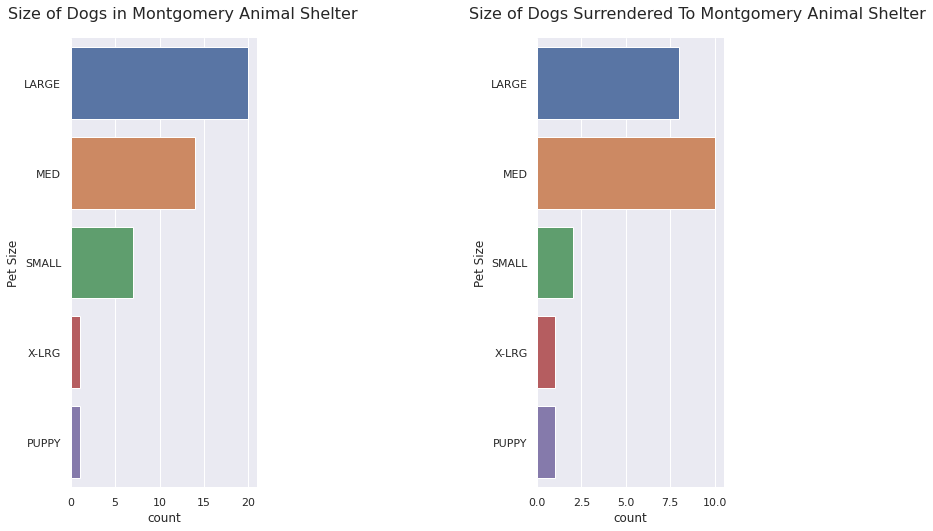

In [29]:
#Plotting the count of Pet Size column
fig, ax =plt.subplots(1,2)
sns.countplot(y="Pet Size", data=adoptable_df, ax=ax[0]).set_title("Size of Dogs in Montgomery Animal Shelter",fontsize=16, x=0.6, y=1.03)
sns.countplot(y="Pet Size", data=sur_df, ax=ax[1]).set_title("Size of Dogs Surrendered To Montgomery Animal Shelter",fontsize=16, x=0.86, y=1.03)
fig.subplots_adjust(wspace=1.5)
sns.set_style("white")
sns.despine(bottom="True", left="True")
fig.show()


Medium to large sized dogs constitute the majority of the dogs at Montgomery Animal Shelter, with large dogs being the most. However according to our surrender dataframe, we can see that medium dogs are surrendered more often than larger dogs. It's possible that this might be the case only because medium dogs may get adopted more often but are surrendered back to the animal shelter compared to large dogs, which might have lower adoption rates overall to cause them to be surrendered. 

## Breed

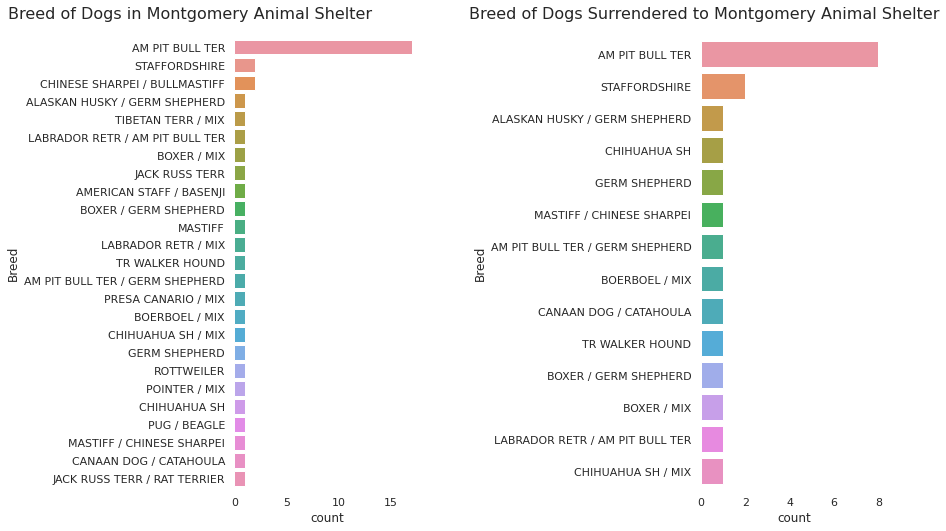

In [30]:
fig, ax =plt.subplots(1,2)
sns.countplot(y='Breed', data = adoptable_df, order = adoptable_df['Breed'].value_counts().index, ax = ax[0]).set_title("Breed of Dogs in Montgomery Animal Shelter", fontsize=16, x=-0.24, y=1.03)
sns.countplot(y='Breed', data = sur_df,order = sur_df['Breed'].value_counts().index, ax = ax[1]).set_title("Breed of Dogs Surrendered to Montgomery Animal Shelter", fontsize=16, x=0.02, y=1.03)
fig.subplots_adjust(wspace=1.5)
sns.set_style("white")
sns.despine(bottom="True", left="True")
fig.show()


From the plot, we can see that pit bull terrier overwhelmingly holds the largest number of occupations in the shelter. Looking at other breeds, they are all quite similar to each other in terms of count. For our surrender dataframe, American Pitbull Terrier also dominates the number of surrenders at the shelter. From this count plot however, it doesn't give us great indicators of other breed. The only information we can pull from this is that American Pitbull Terrier are generally undesirable. It is also important to note that when we shrunk adoptable_df down to sur_df, we lost several breeds. 

Next, we want to compare the count of different types of breed of adoptable_df to shelter_df. We would have to 
look at the top 20 most frequent breeds in shelter_df due to there being thousands of unique breed. The top rank of pitbulls is consistent between both dataframes; however, the frequency percentage for other breeds do not match between the two dataframes. This is possibly because shelter_df has 20000+ more entries. 

In order for us to judge desirablility between breeds, we want to only look at the breeds that were adopted. Additionally, we will only consider the top 20 most frequent breeds in shelter_df

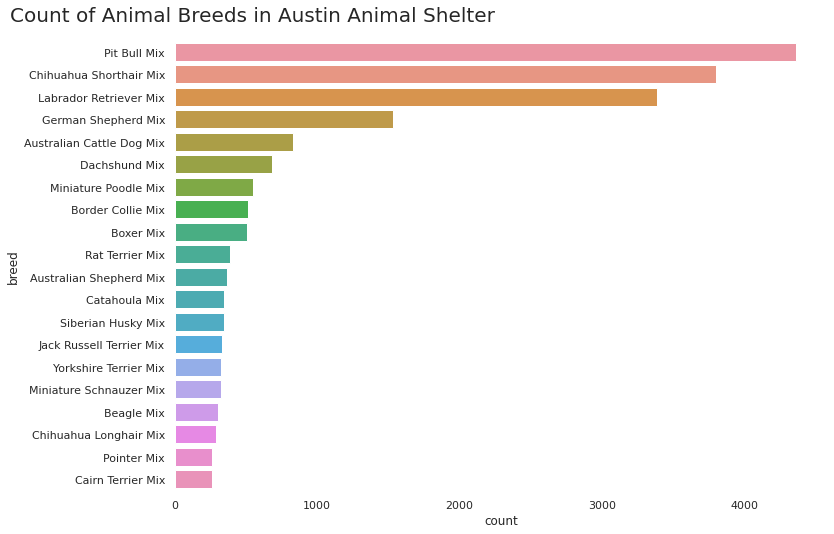

In [31]:
sns.countplot(y='breed', data = shelter_df, order = shelter_df.breed.value_counts().iloc[:20].index)
plt.title('Count of Animal Breeds in Austin Animal Shelter', x=0.12, y=1.03, fontsize = 20)
sns.set_style("white")
sns.despine(bottom="True", left="True")

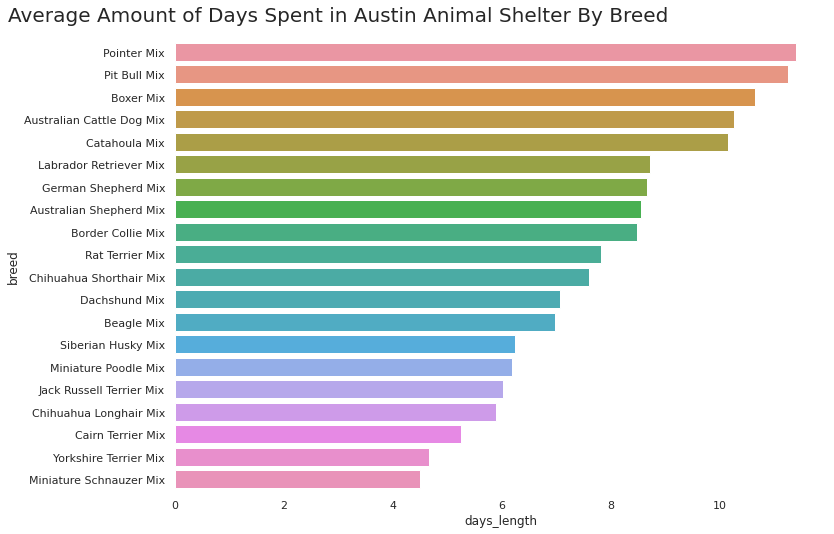

In [32]:
a = shelter_df.groupby('breed', as_index=False)['days_length'].mean().sort_values('days_length', ascending = False)
sns.barplot(x = 'days_length', y = 'breed', data = a, ci = False)
plt.title('Average Amount of Days Spent in Austin Animal Shelter By Breed', y=1.03, x=0.25, fontsize = 20)
sns.set_style("white")
sns.despine(bottom="True", left="True")

From the plot above, pitbull mixes are averaging the most days in the shelter before they are adopted. From the 
countplot in the cell above, we see that the second most frequent breed was Chihuahua Shorthair Mix; however,
in the days_length plot below, chuchuahua Shorthair Mix on average are in the shelter for about 5 less days than Pit Bull Mix.
We also notice that Pointer Mix and Catahoula Mix have low frequency in the adoption shelter, but it seems they're also considered undesireable as their average time in the shelter is around 11-13 days. 

Now that we've analyzed the impact a dog's breed has on its length of stay in a shelter, we want to look at the frequency of dogs that are adopted based on their breed.

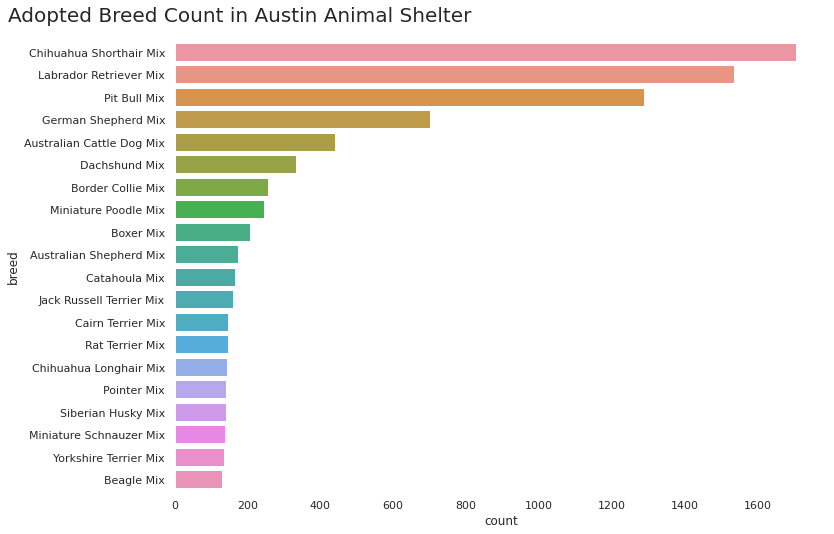

In [33]:
adopted_df = shelter_df[shelter_df['outcome_type'] == "Adoption"]
adopted_df['outcome_type'].unique()
sns.countplot(y='breed', data = adopted_df,  order = adopted_df['breed'].value_counts().iloc[:20].index)

plt.title('Adopted Breed Count in Austin Animal Shelter', y=1.03, x=0.10, fontsize = 20)
sns.set_style("white")
sns.despine(bottom="True", left="True")

## Color

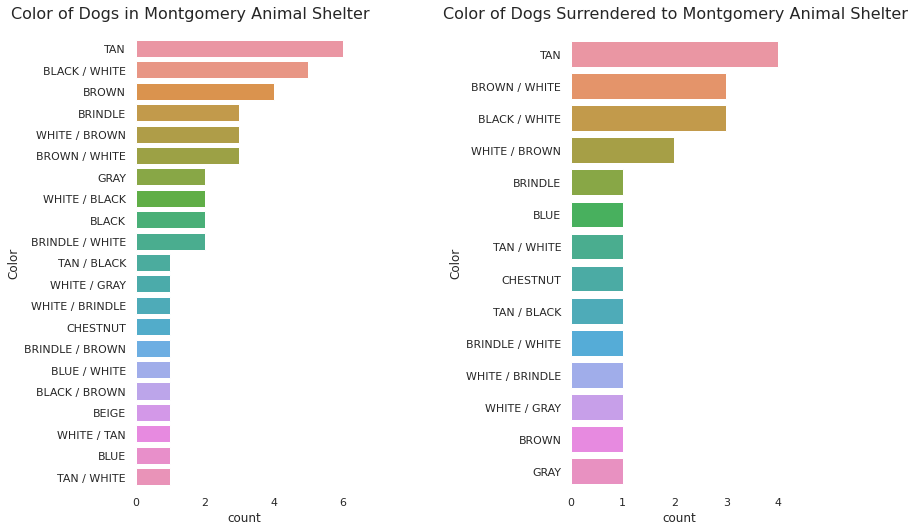

In [34]:
fig, ax =plt.subplots(1,2)
sns.countplot(y='Color', data = adoptable_df,order = adoptable_df['Color'].value_counts().index, ax=ax[0]).set_title("Color of Dogs in Montgomery Animal Shelter", fontsize=16, x=0.25, y=1.03)
sns.countplot(y='Color', data = sur_df, order = sur_df['Color'].value_counts().index, ax = ax[1]).set_title("Color of Dogs Surrendered to Montgomery Animal Shelter", fontsize=16, x=0.48, y=1.03)
fig.subplots_adjust(wspace=1)
sns.set_style("white")
sns.despine(bottom="True", left="True")
fig.show()


The main conclusion we can draw from our plots is that tan is a very common color for dogs. Amongst this, brown within any combination appears to constitute a large proportion of dogs, including in surrendered animals which may indicate brown being an undesireable color. The only exception is brindle/brown and black/brown, which don't show up on our surrendered animals plot. 

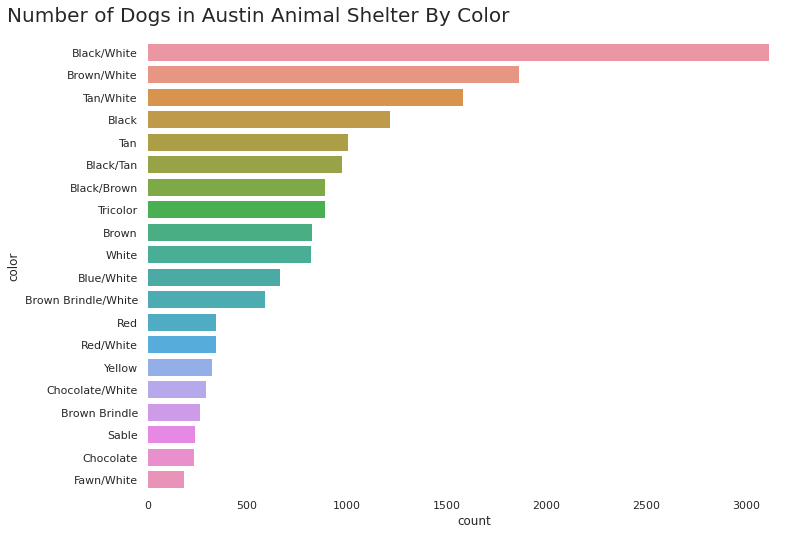

In [35]:
sns.countplot(y='color', data = shelter_df, order = shelter_df.color.value_counts().iloc[:20].index).set_title("Number of Dogs in Austin Animal Shelter By Color", fontsize=20, x=0.17, y=1.03)
sns.set_style("white")
sns.despine(bottom="True", left="True")

#Although the order is slightly different from adoptable_df, we can see that the top common colors are consistent between both
#dataframes. 

Again, without knowing the average days length that these dogs of certain colors are in the shelter for, it is difficult
to determine their desirability. We want to do the same thing we did to the breed column above. We want to plot the color vs average days_length for the top 20 most frequent colors. 

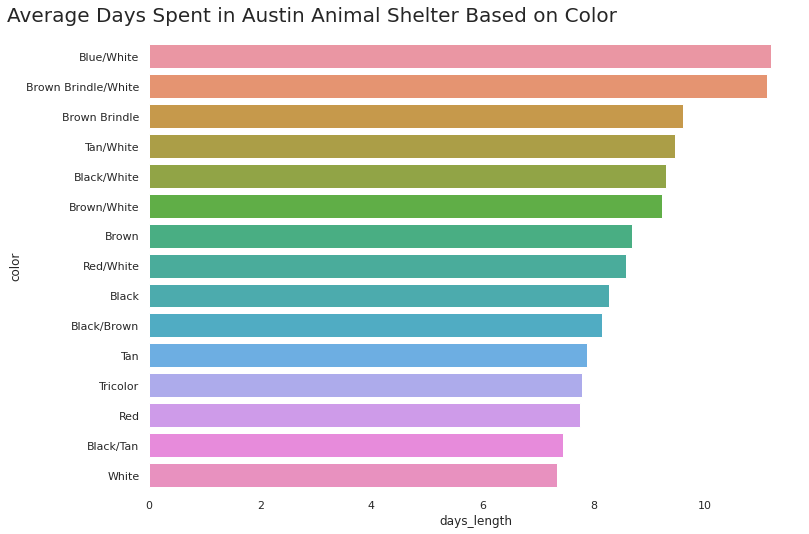

In [36]:
topcolor_df = shelter_df[(shelter_df['color'] == "Black/White") | (shelter_df['color'] == "Tan/White") | (shelter_df['color'] == "Black") |
                        (shelter_df['color'] == "White") | (shelter_df['color'] == "Brown/White") | (shelter_df['color'] == "Tricolor") |
                        (shelter_df['color'] == "Tan") | (shelter_df['color'] == "Black/Tan") | (shelter_df['color'] == "Brown") |
                        (shelter_df['color'] == "White/Black") | (shelter_df['color'] == "White/Brown") | (shelter_df['color'] == "Brown Brindle/White") |
                        (shelter_df['color'] == "Black/Brown") | (shelter_df['color'] == "Blue/White") | (shelter_df['color'] == "White/Tan") |
                        (shelter_df['color'] == "Brown/Black") | (shelter_df['color'] == "Red") | (shelter_df['color'] == "Red/White") |
                        (shelter_df['color'] == "Brown Brindle") | (shelter_df['color'] == "Tan/Black")]

b = topcolor_df.groupby('color', as_index=False)['days_length'].mean().sort_values('days_length', ascending = False)
sns.barplot(x = 'days_length', y = 'color', data = b, ci = False).set_title("Average Days Spent in Austin Animal Shelter Based on Color", x=0.25,y=1.03,fontsize=20)
sns.set_style("white")
sns.despine(bottom="True", left="True")

Our initial conclusions that we drew from Montgomery Animal Shelter that dogs with brown mixed colors being typically considered less desireable seems to also arise in Austin Animal Shelter. However, this again can be construed by the fact that brown mixed colors are extremely common, and constitute a majority of the colors in both of our animal shelter dataframes.

## Sex

The ratio of Sex is heavily skewed towards males in Montgomery Animal Shelter both in the amount of dogs surrendered to the shelter and to the amount of dogs in the shelter itself. 

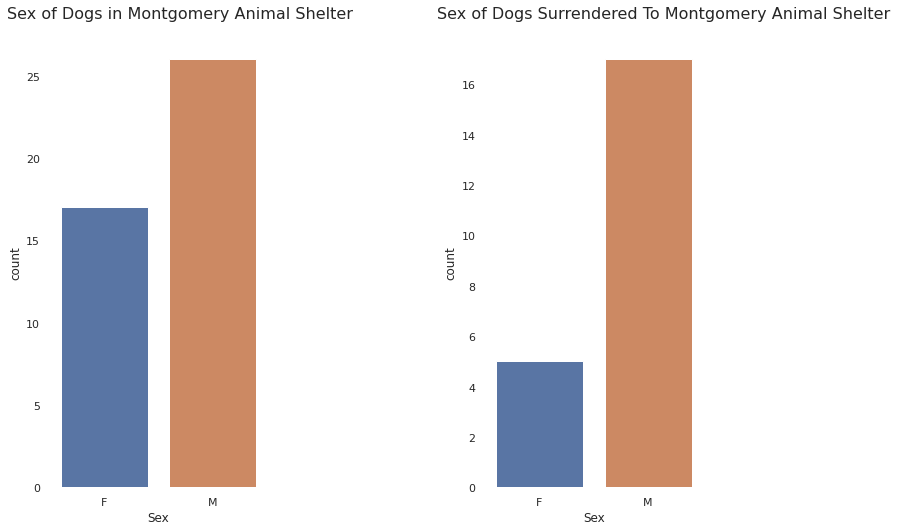

In [37]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Sex', data = adoptable_df, ax = ax[0]).set_title("Sex of Dogs in Montgomery Animal Shelter", fontsize=16, x=0.6, y=1.03)
sns.countplot(x='Sex', data = sur_df, ax = ax[1]).set_title("Sex of Dogs Surrendered To Montgomery Animal Shelter", fontsize=16, x=0.82, y=1.03)
fig.subplots_adjust(wspace=1)
sns.set_style("white")
sns.despine(bottom="True", left="True")
fig.show()

## Age

We now want to take a look at the average age. We would expect that older dogs are not as desirable due to people generally
wanting a younger dog for their physical appeal and the satisfaction of caring for them from a younger age. We will be defining our age ranges for dogs as follows: 

Puppy: 0-12 months
Adult: 12-36 months
Senior: 36 months+

In [38]:
def create_age_conditions(df):
    if df['age_months'] <= 12:
        return 'puppy'
    elif ((df['age_months'] > 12) & (df['age_months'] < 36)):
        return 'adult'
    else:
        return 'senior'

In [39]:
age_df = shelter_df 
age_df['age_type'] = age_df.apply(create_age_conditions, axis=1)

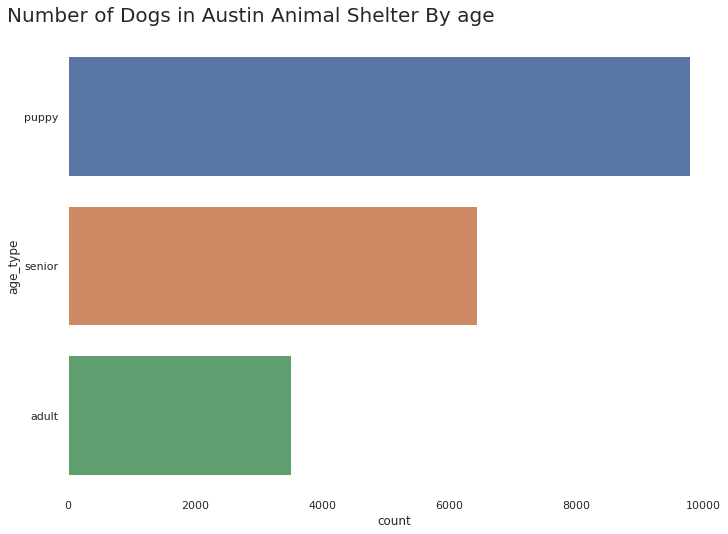

In [40]:
sns.countplot(y='age_type', data = age_df, order = age_df.age_type.value_counts().iloc[:20].index).set_title("Number of Dogs in Austin Animal Shelter By age", fontsize=20, x=0.28, y=1.03)
sns.set_style("white")
sns.despine(bottom="True", left="True")

There seems to be a large proportion of puppies in our shelter, but another interesting factor is that there are more senior dogs than adult ones. 

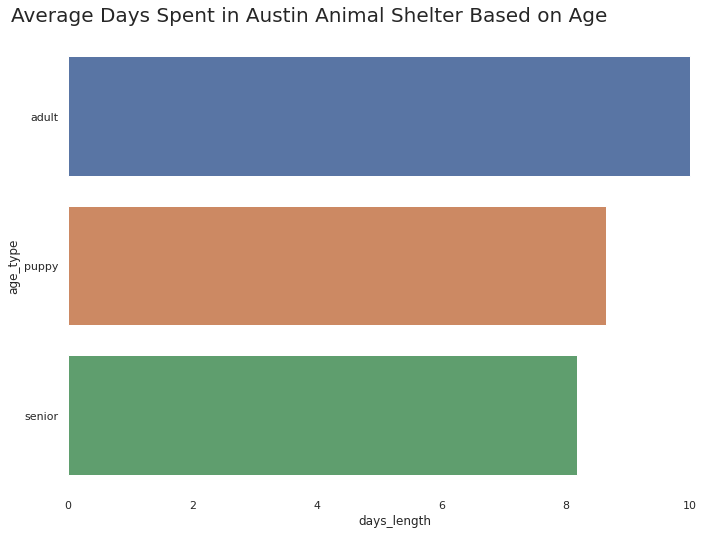

In [41]:
b = age_df.groupby('age_type', as_index=False)['days_length'].mean().sort_values('days_length', ascending = False)
sns.barplot(x = 'days_length', y = 'age_type', data = b, ci = False).set_title("Average Days Spent in Austin Animal Shelter Based on Age",fontsize=20, x=0.37, y=1.03)
sns.set_style("white")
sns.despine(bottom="True", left="True")

We want to try and make a first attempt towards determining a relationship between age and the amount of days a dog might spend in Austin Animal Shelter, however our categories seem to be all over the place, with adults spending the most time yet seniors spending the least. Lets try and look at the age data directly and see whether we can perform more in-depth analysis.

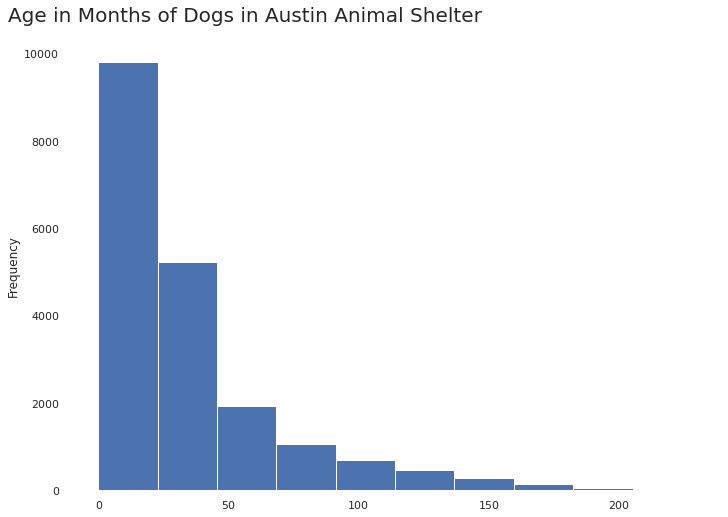

In [42]:
shelter_df['age_months'].plot.hist()
plt.title('Age in Months of Dogs in Austin Animal Shelter',fontsize=20, x=0.27, y=1.03)
sns.set_style("white")
sns.despine(bottom="True", left="True")

The average age of dogs seems to be heavily skewed to the left, meaning that a large proportion of dogs are extremely young. Lets try to take a look at the log of age instead to see if we can get something more normally distributed. 

In [43]:
shelter_df['log_age_months'] = shelter_df['age_months'].apply(lambda x : np.log10(x + 1))

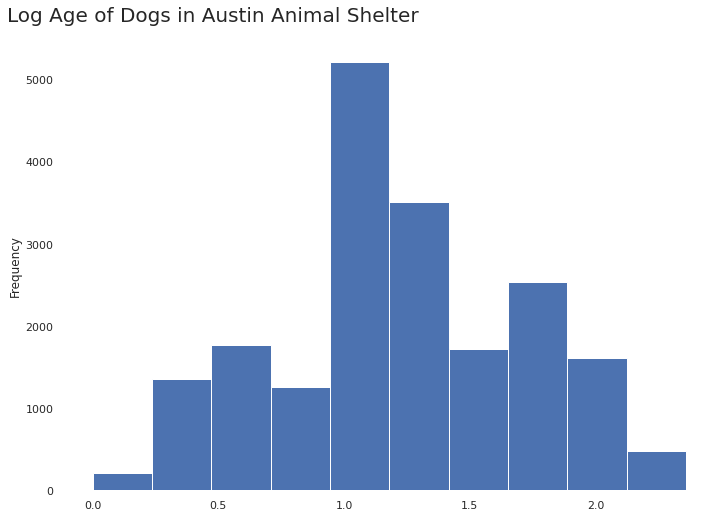

In [44]:
shelter_df['log_age_months'].plot(kind = 'hist')
plt.title('Log Age of Dogs in Austin Animal Shelter', fontsize=20, x=0.23, y=1.03)
sns.set_style("white")
sns.despine(bottom="True", left="True")

This looks better, now lets try and perform linear regression to see if we can find a relationship between the log age and the length of days an animal spends in the shelter. 

In [45]:
outcome, predictors = patsy.dmatrices('log_age_months ~ days_length', shelter_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         log_age_months   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7532
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.385
Time:                        19:06:46   Log-Likelihood:                -14423.
No. Observations:               19631   AIC:                         2.885e+04
Df Residuals:                   19629   BIC:                         2.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2516      0.005    270.524      

Our coefficient here is -0.0003, meaning our slope is basically 0. For every 1 month increase in log age, days length does not increase. Thus, age doesn't seem to have any affect at all on determining the length of stay for a dog at Austin Animal Shelter, which shows our initial expectations were wrong. 

# Decision Tree 

In [46]:
#we now want to begin setting the X and y parameters for our decision tree
x = encoded_df.drop(['outcome_type','conditon_intake','age_bucket','gender_outcome','age_outcome','age_months','date_time_length','month_year_outcome','date_time_outcome','color','breed','animal_type','intake_type','month_year_intake','date_time_intake', 'binary_adoption_outcome'], axis = 1)
y = encoded_df['binary_adoption_outcome'] #we want to put the dependent outcome variable into y
len(encoded_df[encoded_df['binary_adoption_outcome'] == 0])
x.columns

Index(['retriever', 'shepherd', 'beagle', 'terrier', 'boxer', 'poodle',
       'rottweiler', 'dachshund', 'chihuahua', 'pit bull',
       ...
       'German Shepherd Mix', 'Jack Russell Terrier Mix',
       'Labrador Retriever Mix', 'Miniature Poodle Mix',
       'Miniature Schnauzer Mix', 'Pit Bull Mix', 'Pointer Mix',
       'Rat Terrier Mix', 'Siberian Husky Mix', 'Yorkshire Terrier Mix'],
      dtype='object', length=286)

In [47]:
#We want to start splitting the data 
X_train, X_test, y_train, y_test = train_test_split(x, y)
tree_dt = DecisionTreeClassifier()
tree_dt = tree_dt.fit(X_train, y_train)

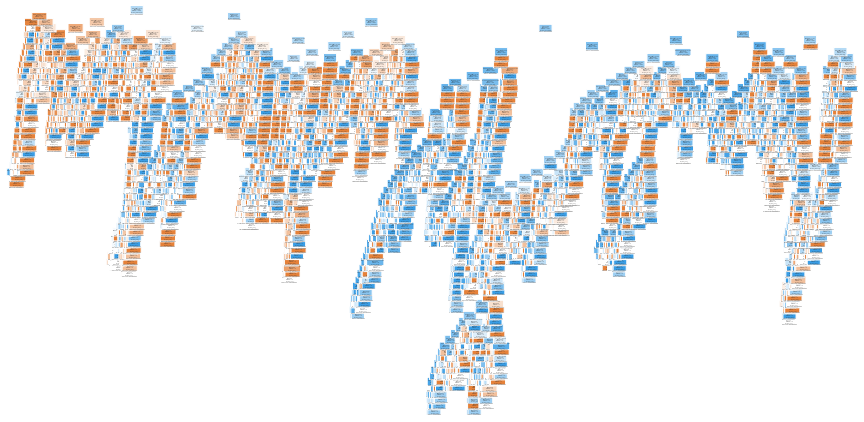

In [48]:
#Plotting the tree
plt.figure(figsize = (15,7.5))
_ = plot_tree(tree_dt,
         filled = True,
         rounded = True,
         class_names = ["not likely adoptable", "likely adoptable"],
         feature_names = x.columns)

Here's the output of our machine learning. However, it's difficult to ascertain much information from the graph itself due to the large amount of variables we had to account for. We'll need to look at the confusion matrix to draw any kind of conclusions from the results. 

Text(0.14, 1.05, 'Original Decision Tree Confusion Matrix')

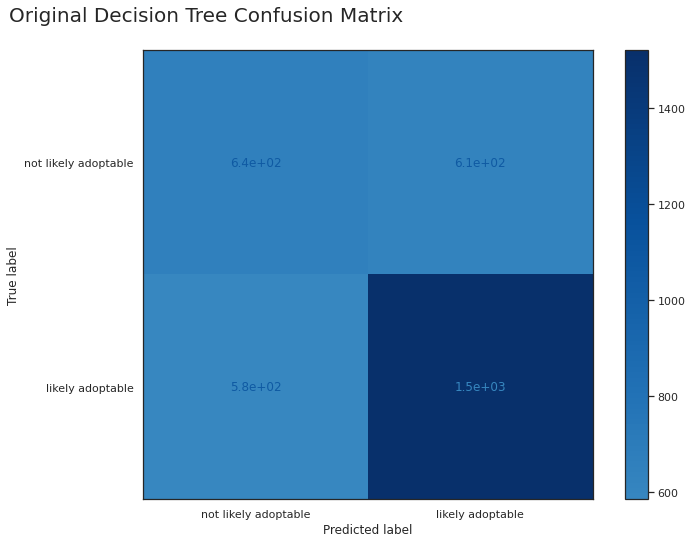

In [49]:
cmap = mpl.cm.Blues(np.linspace(0,1,1500))
cmap = mpl.colors.ListedColormap(cmap[1000:,:-1])
disp = plot_confusion_matrix(tree_dt, X_test, y_test, display_labels=["not likely adoptable", "likely adoptable"], cmap=cmap)
disp.ax_.set_title('Original Decision Tree Confusion Matrix', fontsize=20, x=0.14, y=1.05)

## Pruning the Tree

#### Based on multiple compilations of our confusion matrix, we've found our accuracy to range from 60%-65%. 
One explanation on why it is this low is because we excluded a lot of columns that may have been necessary in creating a more accurate tree. We will try to prune this tree in order to improve the accuracy. Our method of pruning will be using cross validation. 

In [50]:
#We want to test accuracy for different values of alpha. We will store these potential alphas inside of an array.  
path = tree_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-2]
clf_dts = []
ccp_alphas = ccp_alphas[ccp_alphas >= 0]
ccp_alphas
for ccp_alpha in ccp_alphas:
    tree_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    tree_dt.fit(X_train, y_train)
    clf_dts.append(tree_dt)

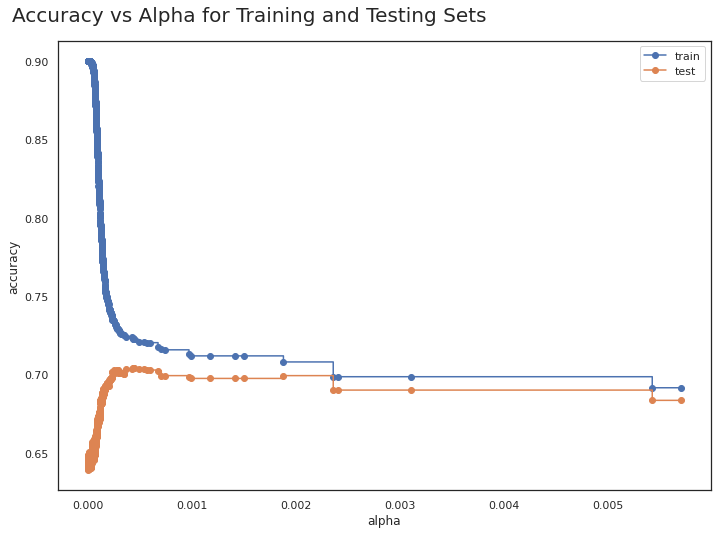

In [51]:
#Using the results from above, we will plot accuracy vs alpha for both training and testing data. 
train_scores = [tree_dt.score(X_train,y_train) for tree_dt in clf_dts]
test_scores = [tree_dt.score(X_test, y_test) for tree_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets", x=0.293, y=1.03, fontsize=20)
ax.plot(ccp_alphas, train_scores, marker = 'o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
ax.set_facecolor('white')
plt.show()
#Looking at the plot, we can see that an ideal alpha lies around where the two plots intersect (3.125e-4). 

In the graph above, in order to prune our tree, we needed to see the alpha values of both training and testing datasets. The plot will show which alpha provides the best accuracy for both datasets. We can see that accuracy is highest where they first intersect at around .0026

In [52]:
#tree_dt = DecisionTreeClassifier(ccp_alpha = .0003125)
alpha_values = []

for ccp_alpha in ccp_alphas:
    tree_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    scores = cross_val_score(tree_dt, X_train, y_train, cv = 5)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    

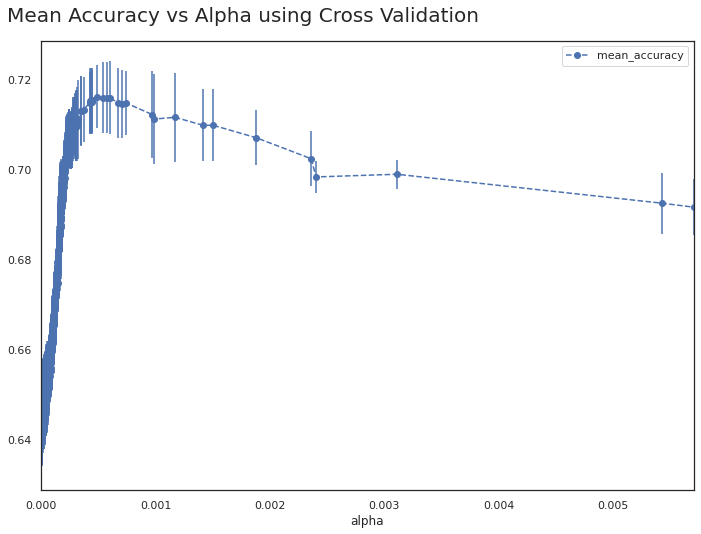

In [53]:
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha',
                  y = 'mean_accuracy',
                  yerr = 'std',
                  marker = 'o',
                  linestyle = '--')
plt.title('Mean Accuracy vs Alpha using Cross Validation', x=0.31, y=1.03, fontsize=20)
ax.set_facecolor('white')

#from this plot, we can see that we would get the highest accuracy around .0005

Our earlier alpha plot for both datasets did not give us a very clear alpha value. Therefore, for the plot above, we used cross validation to obtain the average alpha. We can see that it sits around .0005

In [54]:
effective_alpha = .00045
pruned_tree_dt = DecisionTreeClassifier(ccp_alpha = effective_alpha)
pruned_tree_dt = pruned_tree_dt.fit(X_train, y_train)

[Text(213.3369140625, 387.315, 'days_length <= 0.5\ngini = 0.472\nsamples = 10086\nvalue = [3857, 6229]\nclass = likely adoptable'),
 Text(52.3125, 346.545, 'Owner Surrender <= 0.5\ngini = 0.245\nsamples = 749\nvalue = [642, 107]\nclass = not likely adoptable'),
 Text(26.15625, 305.775, 'gini = 0.04\nsamples = 437\nvalue = [428, 9]\nclass = not likely adoptable'),
 Text(78.46875, 305.775, 'Normal <= 0.5\ngini = 0.431\nsamples = 312\nvalue = [214, 98]\nclass = not likely adoptable'),
 Text(52.3125, 265.005, 'gini = 0.04\nsamples = 97\nvalue = [95, 2]\nclass = not likely adoptable'),
 Text(104.625, 265.005, 'gini = 0.494\nsamples = 215\nvalue = [119, 96]\nclass = not likely adoptable'),
 Text(374.361328125, 346.545, 'Normal <= 0.5\ngini = 0.452\nsamples = 9337\nvalue = [3215, 6122]\nclass = likely adoptable'),
 Text(209.25, 305.775, 'days_length <= 18.5\ngini = 0.461\nsamples = 753\nvalue = [482, 271]\nclass = not likely adoptable'),
 Text(156.9375, 265.005, 'days_length <= 3.5\ngini = 0

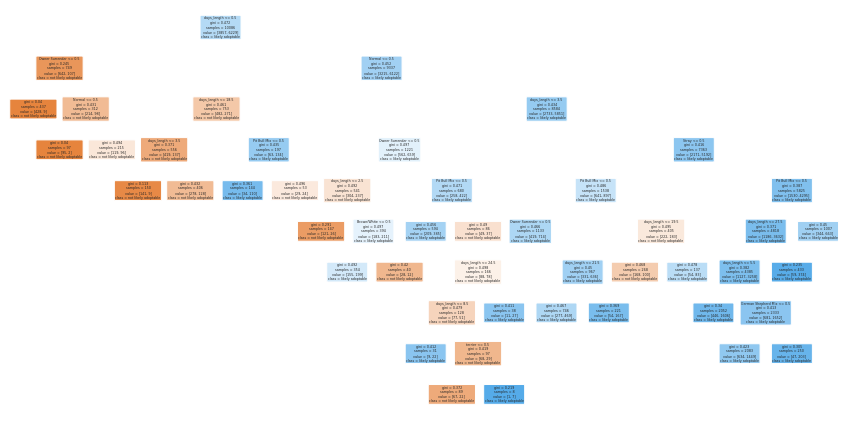

In [55]:
#Plotting the pruned tree
plt.figure(figsize = (15,7.5))
plot_tree(pruned_tree_dt,
         filled = True,
         rounded = True,
         class_names = ["not likely adoptable", "likely adoptable"],
         feature_names = x.columns)

The pruned tree is much smaller and more effective than our original tree. This is because the original tree was overfitted and included branches that did not lead to a result.

Text(0.13, 1.05, 'Pruned Decision Tree Confusion Matrix')

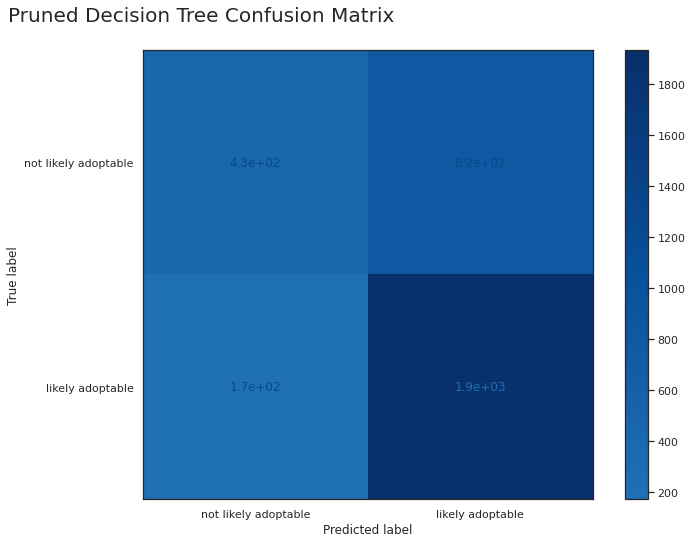

In [56]:
#plotting our pruned tree's confusion matrix
cmap = mpl.cm.Blues(np.linspace(0,1,1600))
cmap = mpl.colors.ListedColormap(cmap[1200:,:-1])
disp = plot_confusion_matrix(pruned_tree_dt, X_test, y_test, display_labels=["not likely adoptable", "likely adoptable"], cmap=cmap)
disp.ax_.set_title('Pruned Decision Tree Confusion Matrix', fontsize=20, x=0.13, y=1.05)

## Machine Learning Result 

#### For our Pruned Decision Tree, our accuracy ranges from 68%-75% for each compilation. 
This has shown to be around a 3-10% increase from our original tree. This slightly low accuracy and low increase can be accounted by the fact that not all of our columns were able to be included in the tree. Additionally, we only chose the 20 most popular breeds and that the outcome_type doesn't do well to predict whether a dog will be adopted or not. We also noticed that the tree does a great job at predicting true positive, however, true negative is incredibly inaccurate. The reason for this is because our dependent variable,binary_adoption_outcome, is very skewed towards having much more adopted pets vs nonadopted pets. Additionally, we were not able to use the entire shelter_df data due to compiling time. Overall, despite this tree having a decent accuracy, we don't think it would be an effective predictive model. 

# Ethics & Privacy

The datasets that we are using are available to the public. We will not be using any personal information on people who have surrendered their pets post holiday season to uphold privacy. Additionally, the data collected have been given by either individual shelters or national organizations to reflect the number of adoptions and pet surrenders they have experienced during a set time. While no personal information was present in the original dataset, we also removed each dog’s name in order to minimize the amount of identifiable information.

Potential biases include: 
- All of our data is gathered from the U.S. This means that the data might be skewed based on regional factors. 
- Additionally, part of the data comes from strays which makes it harder to verify age and breed.
- Because our research relies on the population of dog breeds that are most prevalent in the U.S. and the U.S.’s cultural view on pet adoption, our finding would only provide a narrow perspective on dog adoption worldwide. It could of course be extrapolated to predict adoption rates in other countries, but we would expect it to be less accurate.
- Some of the dogs’ descriptions were vague and things such as breed and color can be indefinite 
- Our data only includes dogs who are in adoption shelters, meaning it ignores stray dogs without homes who are not registered

Our analysis could of course be extrapolated to predict adoption rates in other countries, but we would expect it to be less accurate as factors such as prevalence of dog breeds, attitude towards adoption, and attitude toward pet ownership as a whole may differ across cultures.

As stated previously, our dataset doesn’t contain any personal (human) information, but it does exclude stray dogs. It would be interesting to run a similar analysis on stray populations to see if the results differ. 

To counteract these biases, we would need to run analyses on datasets from a broad range of countries in different regions. Using a larger dataset would also allow us to remove all unspecified data while maintaining accurate results.



# Conclusion & Discussion

Our project aims to answer the question, “Can we predict the likelihood of a dog’s adoption based on it’s traits?” In order to create a model that will predict the adoption rates of dogs with specific traits, we used datasets from two different animal shelters in different regions to compare our results. Both datasets contained different traits of the dogs at the shelter and how long it took them to be adopted, if at all. We cleaned our first dataset, which we named as shelter_df, to contain the intake time, condition, intake type, age, breed, color, and outcome time/type. This was data taken from the Austin Animal Shelter, located in Texas. For our second dataset, adoptable_df, we cleaned up the data to contain the traits: age, size, color, breed and sex. This was taken from the Montgomery County Animal Services, located in Maryland. Both datasets helped us compare our answers between two geographically different regions, Texas and Maryland. For our second dataset, we compared what types of dogs were surrendered or returned to the shelter. We used one hot encoding to help create a machine learning model that would predict how likely a dog was to be adopted. We created two dataframes with the data from Montgomery: one containing dogs of all types of intake type and another containing only those who were surrendered or returned to the shelter. From there we compared the two dataframes by individual traits to see a pattern in what types of dogs were most likely to be surrendered/returned. Our adoptable_df showed us which dogs with certain traits were most present in the shelter while sur_df showed us which traits had the most number dogs surrendered or returned. We ran this multiple times for different traits, starting with the breed. Then we compared the data in shelter_df (from Austin) to see how long each breed stayed in the shelter on average. We continued for the color of the dog and the sex of the dog. For age, we used linear regression to determine if there was a relationship between age and the amount of days spent in the shelter before being adopted.

The results we found from analyzing the different traits amongst the two dataset helped us conclude that medium sized, female dogs were the most likely to be adopted. Conversely, we found while there were more large dogs in shelters in total, medium dogs were surrendered/returned more. We also found that pit bull mix dogs stayed at the shelter the longest, was one of the top in the number available at the shelters, and also had one of the highest numbers of surrendered/returned across both datasets. Within the adoptable_df, it was found that tan colored dogs were the highest in the number of dogs present at the Montgomery Shelter as well as highest to be surrendered/returned. On the other hand, our data from Austin showed that Brown/White dogs stayed in the shelter the longest. This shows a slight relation to the tan result as both are similar colors. In terms of age, our linear regression model determined that there was no correlation between age and the amount of days spent in the Texas Animal Shelter. Through our analysis, we were able to create a machine learning model that will predict how likely a dog will be adopted at about 70% accuracy (a range for 68% to 75%). 

Some limitations we found from our project was that when we did compare the number of those surrendered, those who were generally more in the shelter had a higher rate due to the high number of dogs to begin with. Another limitation or even bias on our data is that many records do not accurately reflect a dog’s breed as it is usually a best guess based on the dog’s most dominant visible trait. Due to this, there can be misrepresentation from worker’s perspectives of certain dog breeds. This also applied to measuring things such as color as many dogs have different unique colors and patterns that make it hard to accurately categorize. Some traits had to be generalized due to the sheer number of individuality in different dogs. Our data also was limited to regions in United States. The bias of certain dogs and their features can be different based on culture, and thus our project does not accurately represent dog adoption rates for a bigger region. We hope that our analysis of the data can help shelters prioritize dogs that are more likely to be surrendered/less likely to be adopted. By knowing what traits are popular, some dogs with few popular traits but other not so popular traits can be shown to highlight the traits that may help it get adopted. Furthermore, by knowing which types of dogs are being stereotyped or ignored, we can take towards the public to improve the image of those dogs and lift any misconceptions. By being informed of which dogs are also more likely to be surrendered, further research can be done on it’s cause, and measures can be taken to avoid the return of a dog by being specific in the adoption process. As a group, we hope our data would be able to help more dogs find permanent, loving homes. 


# Team Contributions

Isaac Bi - Coding (Data Analysis/Data Cleaning) <br>
Bella Chen - Writing (Background & Prior Work/Data Cleaning) <br>
Cole Franklin - Writing (Ethics and privacy/Overview/Hypothesis) <br>
Ji Hyun An - Writing (Dataset/Conclusion & Discussion) <br>
Khoi Tran - Coding (Data Analysis/Data Cleaning)